In [20]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import math

# 1.Delete all the outlier data for the GarageArea field (for the same data set in the use case: House Prices).

In [21]:
#Read the dataset
traindata = pd.read_csv("houses_dataset.csv")

In [22]:
#Describe the SalePrice
traindata.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [23]:
#Describe the GarageArea
traindata.GarageArea.describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

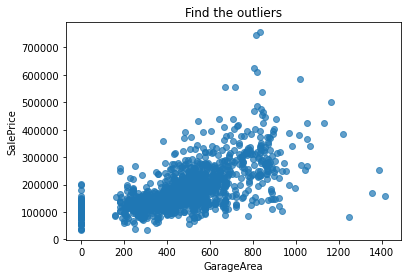

In [24]:
#plot GaurageArea field and SalePrice in scatter plot
plt.scatter(traindata.GarageArea, traindata.SalePrice,alpha=0.7,cmap='plasma') #alpha helps to show overlapping data
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.title('Find the outliers')
plt.show()

In [25]:
#detecting the outliers
outlier = traindata[(traindata['GarageArea'] <= 900) & (traindata['GarageArea'] >= 100)]

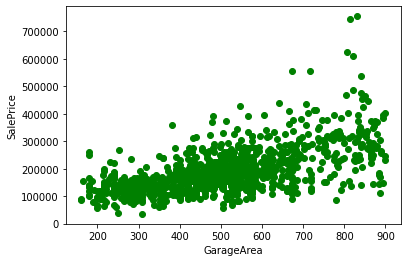

In [26]:
# Print plot with Outliers
plt.scatter(outlier.GarageArea, outlier.SalePrice, color='green')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

In [27]:
# Print Anomalies numbers
print('The numbers of Anomalies: ', '\n', traindata[(traindata['GarageArea'] <= 1400) & (traindata['GarageArea'] >= 899)])

The numbers of Anomalies:  
         Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
178    179          20       RL  ...       New        Partial    501837
224    225          20       RL  ...        WD         Normal    386250
268    269          30       RM  ...        WD         Normal    120500
270    271          60       FV  ...       New        Partial    266000
317    318          60       FV  ...        WD         Normal    270000
408    409          60       RL  ...       New        Partial    280000
473    474          20       RL  ...       New        Partial    440000
515    516          20       RL  ...       New        Partial    402861
552    553          20       RL  ...        WD         Normal    255500
581    582          20       RL  ...       New        Partial    253293
664    665          20       RL  ...       New        Partial    423000
718    719          60       RL  ...        WD         Normal    341000
803    804          60       RL  ..

# 2. Evaluate the model using MAE, MSE, RMSE and R2 score.

In [28]:
#handling missing value
data1 = traindata.select_dtypes(include=[np.number]).interpolate().dropna()

In [29]:
#Build a linear model
y = np.log(traindata.SalePrice)
X = data1.drop(['SalePrice', 'GarageCars'], axis=1)

In [30]:
#split the data1 into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [31]:
#Fit Linear Model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [32]:
#prediction
predictions = model.predict(X_test)

In [33]:
#Evaluation the model

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, predictions)

print('Mwan Absulate Error is: \n', mae)
print('\n')
print('Mean Squared Error is: \n', mse)
print('\n')
print('Root Mean Square Error (RMSE) is: \n', rmse)
print('\n')
print("R Squared (R²) Score is: \n", r2)

Mwan Absulate Error is: 
 0.11045729686094531


Mean Squared Error is: 
 0.023613848121870142


Root Mean Square Error (RMSE) is: 
 0.15366798014508468


R Squared (R²) Score is: 
 0.861446597084506


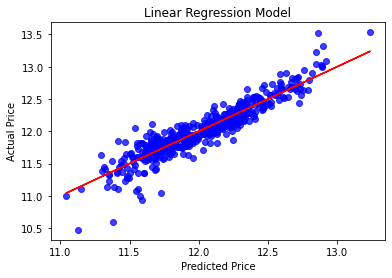

In [34]:
actual_values = y_test
plt.scatter(predictions, y_test, alpha=.75, color='b') #alpha helps to show overlapping data
plt.plot(predictions, model.predict(X_test),color='red')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [35]:
#Bonus work : 
#Read the data with different name
bonusdataset = pd.read_csv("houses_dataset.csv")

# Find any of the features that are positively correlated with SalePrice.

numeric_features = bonusdataset.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print("Positive Correlation:")
print(corr['SalePrice'].sort_values(ascending=False)[:5], '\n')

Positive Correlation:
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 



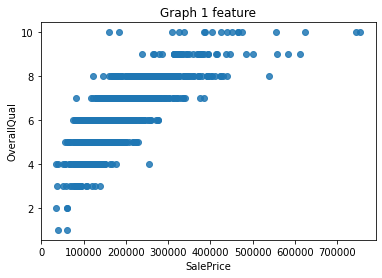

In [36]:
#Select one feature and SalePrice and graph it.
plt.scatter(bonusdataset.SalePrice, bonusdataset.OverallQual,alpha=0.85,cmap='plasma')
plt.xlabel('SalePrice')
plt.ylabel('OverallQual')
plt.title('Graph 1 feature')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


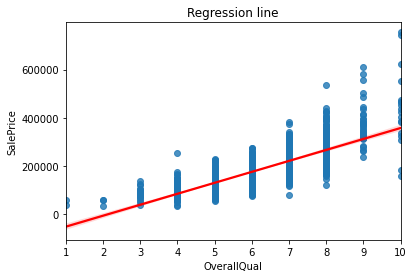

In [37]:
# Apply simple linear regression on the selected feature and the target (dependent) SalePrice.
# Draw the regression line on the graph

#AS I am doing more practic I changed with different library to figure the regression line (Statemodels regression)
from statsmodels.formula.api import ols
import seaborn as sns
import scipy.stats as stats


x=bonusdataset['OverallQual']
y=bonusdataset['SalePrice']

bouncemd = ols('SalePrice~ OverallQual', data = bonusdataset)
fitmodel = bouncemd.fit()

fig = plt.figure()
plt.xlabel('SalePrice')
plt.ylabel('Overall Quality')
plt.title('Regression line')
fig= sns.regplot(x,y, line_kws = {'color':'red'})
plt.show()

# For questions 2 and 3 use the Restaurant Revenue Prediction dataset: https://www.kaggle.com/c/restaurant-revenue-prediction

In [38]:
#Training data set
trainrestdata = pd.read_csv('rest_data.csv')
print('\n', 'The described data: ', '\n', trainrestdata.revenue.describe(), '\n')

#Handling missing value
data = trainrestdata.select_dtypes(include=[np.number]).interpolate().dropna()


 The described data:  
 count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64 



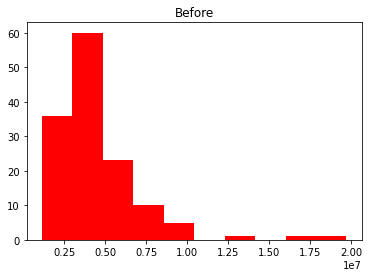

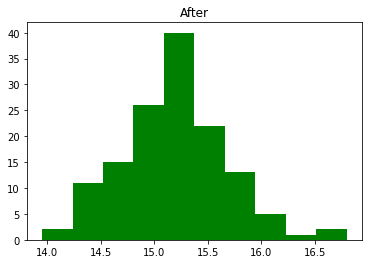

In [39]:
# Explore the data and engineer Features
plt.hist(trainrestdata.revenue, color='red')
plt.title('Before')
plt.show()

#Log transform the target
target = np.log(trainrestdata.revenue)
plt.hist(target, color="Green")
plt.title("After")
plt.show()

In [40]:
#Build a linear model
y = np.log(trainrestdata.revenue)
X = data.drop(['revenue', 'Id'], axis=1)

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.20)

#Build the model
lr = linear_model.LinearRegression()
model2 = lr.fit(X_train, y_train)

In [41]:
#Evaluate the performance
print("R Squared (R²) Score is: \n", model2.score(X_test, y_test))

print('\n')

predictions = model2.predict(X_test)
print('Root Mean Square Error (RMSE) is: \n', mean_squared_error(y_test, predictions))

R Squared (R²) Score is: 
 -1.1280520942721401


Root Mean Square Error (RMSE) is: 
 0.6344522415501069


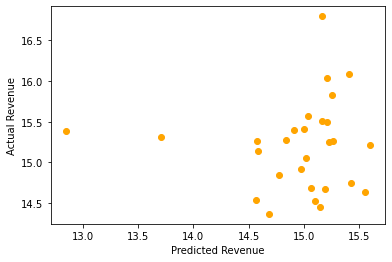

In [42]:
#visualize it
actual_values = y_test
plt.scatter(predictions, actual_values, color='orange')
plt.xlabel('Predicted Revenue')
plt.ylabel('Actual Revenue')
plt.show()